# MOVIE RECOMMENDATION SYSTEM - MACHINE LEARNING – PROJECT


In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
# loading ratings csv file
df_ratings = pd.read_csv('ratings.csv', usecols=['userId','movieId','rating'])

# loading movies csv file
df_movies = pd.read_csv('movies.csv', usecols=['movieId','title'])

In [209]:
df_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [210]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [211]:
df = pd.merge(df_movies,df_ratings,on='movieId')

In [212]:
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   userId   100836 non-null  int64  
 3   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.8+ MB


In [214]:
df.describe()

,movieId,userId,rating
count,100836.000000,100836.000000,100836.000000
mean,19435.295718,326.127564,3.501557
std,35530.987199,182.618491,1.042529
min,1.000000,1.000000,0.500000
25%,1199.000000,177.000000,3.000000
50%,2991.000000,325.000000,3.500000
75%,8122.000000,477.000000,4.000000
max,193609.000000,610.000000,5.000000


Distribution of Ratings, we can conclude most of the ratings are in between 2.5 and 5

<AxesSubplot:xlabel='rating', ylabel='count'>

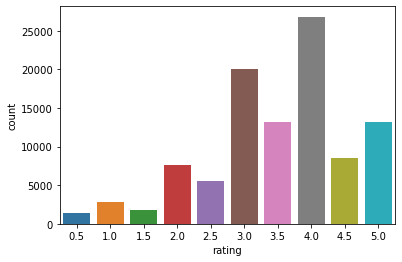

In [215]:
sns.countplot(x='rating',data=df)

by the below figure we can conclude that almost every user rated less than 500 movies except some outliers

<AxesSubplot:xlabel='userId', ylabel='count'>

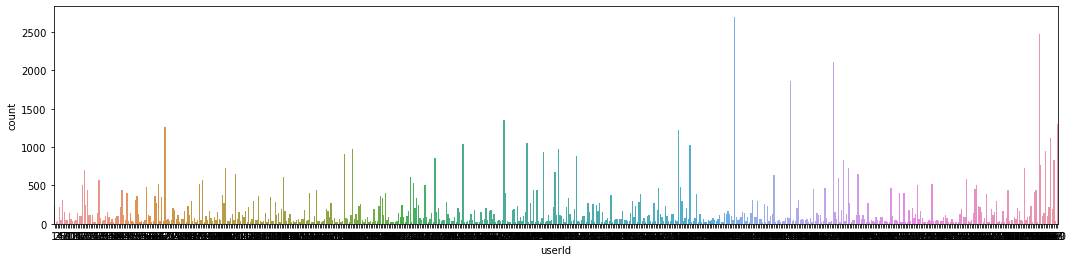

In [226]:
plt.figure(figsize=(18,4))
sns.countplot(x='userId',data=df)

Now we make one dataframe for 'num_of_ratings' because it make sense if we recommend only that have high number of ratings

In [217]:
ratings_count = pd.DataFrame(df.groupby('title')['rating'].count())
ratings_count = ratings_count.reset_index(level=['title'])
ratings_count.head(10)

,title,rating
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
5,'Tis the Season for Love (2015),1
6,"'burbs, The (1989)",17
7,'night Mother (1986),1
8,(500) Days of Summer (2009),42
9,*batteries not included (1987),7


Hight rated movies

In [218]:
df[df['rating']==5.0][['title','rating']].drop_duplicates(subset=['title']).head()

,title,rating
9,Toy Story (1995),5.0
227,Jumanji (1995),5.0
326,Grumpier Old Men (1995),5.0
384,Father of the Bride Part II (1995),5.0
435,Heat (1995),5.0


Low rated movies

In [219]:
df[df['rating']==1.0][['title','rating']].drop_duplicates(subset=['title']).head()

,title,rating
239,Jumanji (1995),1.0
345,Grumpier Old Men (1995),1.0
381,Waiting to Exhale (1995),1.0
481,Heat (1995),1.0
540,Sabrina (1995),1.0


Let's now make a matrix with the user ids on one axis and the movie title on the other. Each cell will then include the user's rating for that particular film. Because most people haven't seen most of the movies, there will be a lot of NaN values.

In [228]:
matrix_user_title = df.pivot_table(index='userId',columns='title',values='rating')

#filling the NAN values with 0
matrix_user_title = matrix_user_title.fillna(0)
matrix_user_title.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
def similar_to_the_given_movie(input_movie):
    #get user ratings for the given movie
    ratings_of_given_movie = matrix_user_title[input_movie]
    
    #now we correalte the above user ratings in the matrix to obtain similar movies
    similar_ratings = matrix_user_title.corrwith(ratings_of_given_movie)
    df_title_corr = pd.DataFrame(similar_ratings,columns=['Correlation'])
    
    #dropping null values
    df_title_corr.dropna(inplace=True)
    df_title_corr = df_title_corr.reset_index(level=['title'])
    
    #we are making sure the movie has atleast 50 ratings to consider for the recommendation
    df2 = ratings_count[ratings_count['rating']>50]
    df_final = pd.merge(df_title_corr,df2,on='title')
    
    #sorting the dataframe according to the correlation
    df_final = df_final.sort_values('Correlation',ascending=False).head(10)
    return df_final

In [222]:
# input_movie = 'Toy Story (1995)'
input_movie = 'Jumanji (1995)'

In [223]:
#function call
df_final = similar_to_the_given_movie(input_movie)

F:\CDrive\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
F:\CDrive\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


The below dataframe denotes the top 10 similar movies to the given input movie

In [224]:
df_final

,title,Correlation,rating
223,Jumanji (1995),1.000000,110
289,Notting Hill (1999),0.798372,56
266,Million Dollar Baby (2004),0.716712,52
295,"Others, The (2001)",0.698576,55
129,Donnie Brasco (1997),0.687060,52
358,"Social Network, The (2010)",0.673058,57
154,First Knight (1995),0.669709,54
240,Liar Liar (1997),0.659437,74
90,Chinatown (1974),0.656153,59
229,"King's Speech, The (2010)",0.656139,58
